<h2>Kelompok 8 : Analysis Sentiment Saham Menggunakan Naive Bayes Multinomial <br></h2>
Ketua Kelompok : Aditya Fathan Santoso 00000058919
<br>Anggota Kelompok :
- Rifcki Dwiyansah	00000055611
- Willyam Louise. V	00000055805
- Fathimah Az Zahra	00000056188




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df = pd.read_csv('stock_senti_analysis.csv', encoding = 'Latin-1')
df.head(5)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


Penjelasan code diatas : Code diatas digunakan untuk melakukan import data dengan encoding latin-1 yang berguna untuk membaca 256 karakter. sehingga dapat membaca tanda baca dan karakter lainnya.

In [ ]:
df.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4101 non-null   object
 1   Label   4101 non-null   int64 
 2   Top1    4101 non-null   object
 3   Top2    4101 non-null   object
 4   Top3    4101 non-null   object
 5   Top4    4101 non-null   object
 6   Top5    4101 non-null   object
 7   Top6    4101 non-null   object
 8   Top7    4101 non-null   object
 9   Top8    4101 non-null   object
 10  Top9    4101 non-null   object
 11  Top10   4101 non-null   object
 12  Top11   4101 non-null   object
 13  Top12   4101 non-null   object
 14  Top13   4101 non-null   object
 15  Top14   4101 non-null   object
 16  Top15   4101 non-null   object
 17  Top16   4101 non-null   object
 18  Top17   4101 non-null   object
 19  Top18   4101 non-null   object
 20  Top19   4101 non-null   object
 21  Top20   4101 non-null   object
 22  Top21   4101 non-null   

Penjelasan Code diatas : Code diatas digunakan untuk melihat informasi singkat mengenai data yang telah di import. dapat dilihat bahwa data pada features 24-26 memiliki nilai null

In [ ]:
print(df.shape)

(4101, 27)


In [ ]:
df.isna().any()

Date     False
Label    False
Top1     False
Top2     False
Top3     False
Top4     False
Top5     False
Top6     False
Top7     False
Top8     False
Top9     False
Top10    False
Top11    False
Top12    False
Top13    False
Top14    False
Top15    False
Top16    False
Top17    False
Top18    False
Top19    False
Top20    False
Top21    False
Top22    False
Top23     True
Top24     True
Top25     True
dtype: bool

Penjelasan Code diatas : Code diatas digunakan untuk melihat apakah ada nilai NaN pada dataframe df

In [ ]:
df.dropna(inplace=True)
print(df.shape)

(4098, 27)


Penjelasan Code diatas : code diatas digunakan untuk melakukan penghapusan rows data yang tidak memiliki isi atau bernilai null

In [ ]:
df_copy = df.copy()

Penjelasan Code diatas : Code diatas digunakan untuk mengcopy df kedalam df_copy

In [ ]:
df_copy.reset_index(inplace=True)

Penjelasan Code diatas : Code diatas digunakan untuk melakukan reset index pada df_copy

In [ ]:
df_copy.shape

(4098, 28)

In [ ]:
# headline dibawah tanggal 01/01/2015  akan dijadikan data training
df_train = df_copy[df_copy['Date'] < '20150101']
# headline yang akan dijadikan data testing
df_test = df_copy[df_copy['Date'] > '20141231']

print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 3972
TEST size: 378


Penjelasan Code diatas : Code diatas digunakan untuk pengambilan data atau data splitting. dimana data yang digunakan untuk train adalah news headline yang dirilis dibawah 1 Januari 2015 dan untuk training nya menggunakan data diatas 31 Desember 2014. Sehingga dari splitting tersebut kita mendapatkan train data sebesar 3972 dan data testing sebanyak 378

In [ ]:
df_train.columns

Index(['index', 'Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5',
       'Top6', 'Top7', 'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13',
       'Top14', 'Top15', 'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21',
       'Top22', 'Top23', 'Top24', 'Top25'],
      dtype='object')

In [ ]:
y_label_train = df_train['Label']
y_label_test = df_test['Label']
trainclean = df_train.iloc[:, 3:28]
testclean = df_test.iloc[:, 3:28] # berisi fitur-fitur yang akan digunakan sebagai input dalam suatu model, baik pada data latihan maupun data uji.

Penjelasan Code diatas : code diatas digunakan untuk melakukan pemilihan feature yang akan digunakan, jadi feature yang akan digunakan adalah index 3 hingga 28 yang merupakan news headline dari top1 hingga top25. train clean dan test clean hanya berisikan news headline saja

In [ ]:
new_columns = [str(i) for i in range(0,25)]
trainclean.columns = new_columns
testclean.columns = new_columns # Setiap elemen dalam list adalah string yang menggambarkan angka dari 0 hingga 24

Penjelasan Code diatas : Code diatas digunakan untuk mengubah nama fitur yang tadinya top1, top2 hingga top25 diubah menjadi angka 1,2 hingga 25

In [ ]:
#lowercasing
for col in trainclean.columns:
    trainclean[col]=trainclean[col].str.lower()

for col in testclean.columns:
    testclean[col]=testclean[col].str.lower()

Penjelasan Code diatas : code diatas digunakan untuk melakukan lowercasing setiap kata kata yang ada di dalam trainclean dan testclean hal ini dibuat dengan tujuan agar isi datanya menjadi lebih konsisten.

In [ ]:
#remove_punctuation
import string

def remove_punctuations(text): # Untuk menghapus tanda baca
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text # mengembalikan teks yang sudah dihapus tanda bacanya setelah proses penggantian selesai.

Penjelasan Code diatas : code diatas adalah code untuk menghapus tanda baca. hal ini dilakukan karena tanda baca tidak diperlukan pada sentiment analysis. selain untuk meredudansi, hal ini juga dilakukan untuk menyesuaikan kata kata agar terbaca sesuai dengan beberapa library. contohnya melakukan stemming dan stopword

In [ ]:
trainclean = trainclean.applymap(remove_punctuations) # Untuk menerapkan fungsi pada sebuah element dalam DataFrame
testclean = testclean.applymap(remove_punctuations)

Penjelasan Code diatas : code diatas digunakan untuk melakukan penereapan function untuk menghapus tanda baca.

In [ ]:
#Menggabungkan seluruh kata data

traindat = []
testdat = []

for row in range(0, trainclean.shape[0]):
  traindat.append(' '.join(str(x) for x in trainclean.iloc[row, 2:25]))

for row in range(0, testclean.shape[0]):
  testdat.append(' '.join(str(x) for x in testclean.iloc[row, 2:25]))

print(traindat)


# Kami menggabungkan nilai kolom 2 hingga 25 di setiap baris DataFrames trainclean dan testclean
# menggunakan instruksi yang disebutkan di atas. Daftar traindat dan testdat kemudian diperbarui
# dengan string ini. Daftar nilai total traindat yang ditulis pada baris terakhir berfungsi
# sebagai gambaran output yang mungkin dihasilkan

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Penjelasan Code diatas : code diatas digunakan untuk menggabungkan semua kata kata yang telah di lower casing dan kata kata yang sudah dibersihkan dari tanda baca. sehingga kata kata tersebut menjadi 1 kalimat utuh di tiap tiap column.

In [ ]:
traindat[5]

'second division roundup european roundup third division roundup welfare could claim killie tie as caley thistle land celtic ferguson puts brave face on rio meltdown southgate in striking form to preempt penalties second bite for wolves scallywags have chelsea looking to the bench england miss a trick for centurion radio just in time for england batting collapse faith in the future youth at the helm until it goes under united stave off inevitable time warner and aol to merge keep up waging global war desktop icons no 1 the qwerty keyboard the secs files the low down workplace bullying met not equipped to solve murders tranmere tie will not be replayed rebel attacks take toll on russia met lent stopped car to lawrence'

In [ ]:
testdat[5]

'french government donates 12 million to ensure charlie hebdo lives on hezbollah secretary general sayyed hassan nasrallah the actions of takfiri groups like al qaeda and the islamic state offended prophet mohammad more than the charlie hebdo cartoons mocking him charlie hebdo hunt shots fired as police chase car  possible hostages taken islamic state brags we did paris  tomorrow will be in britain america in wake of charlie hebdo attacks secularist groups to seek end of canadas blasphemy law saudi arabia to flog man 1000 times for insulting religion on facebook websites of towns near paris hacked replaced with isis flag indian government fires employee who skipped work for 24 years egypts president calls for a revolution in islam the uk is now more religiously diverse than ever but at the same time the number of people with no religion is at an alltime high britains mi5 chief warns al qaeda in syria planning mass attacks on west top iranian cleric condemns paris shooting we strongly c

In [ ]:
from nltk.corpus import stopwords # Berisi kumpulan kata
from nltk.stem import PorterStemmer # Untuk mengubah kata-kata menjadi bentuk dasar
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

copy_traindat = traindat.copy()
copy_testdat = testdat.copy()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train_filtered_text_list = []
porter = PorterStemmer()
#tokenize
for text in copy_traindat:
    text = nltk.word_tokenize(text)
#filtering
    text = [word for word in text if word not in set(stopwords.words('english'))]
#Stemming
    text = [porter.stem(token) for token in text]


    filtered_text = ' '.join(text)
    train_filtered_text_list.append(filtered_text)

print(train_filtered_text_list[5])

second divis roundup european roundup third divis roundup welfar could claim killi tie caley thistl land celtic ferguson put brave face rio meltdown southgat strike form preempt penalti second bite wolv scallywag chelsea look bench england miss trick centurion radio time england bat collaps faith futur youth helm goe unit stave inevit time warner aol merg keep wage global war desktop icon 1 qwerti keyboard sec file low workplac bulli met equip solv murder tranmer tie replay rebel attack take toll russia met lent stop car lawrenc


Penjelasan Code diatas : code diatas digunakan untuk melakukan stemming dan remove stop words. sebelum melakukan kedua hal tersebut diperlukan tokennizing untuk memisahkan kalimat menjadi 1 kata sehingga dapat melakukan stemming di tiap tiap katanya dan dapat mendeteksi stopwords seperti "the" "is" dan lainnya.

In [ ]:
test_filtered_text_list = []
porter = PorterStemmer()
#tokenize
for text in copy_testdat:
    text = nltk.word_tokenize(text)
#filtering
    text = [word for word in text if word not in set(stopwords.words('english'))]
#Stemming
    text = [porter.stem(token) for token in text]


    filtered_text = ' '.join(text)
    test_filtered_text_list.append(filtered_text)

print(test_filtered_text_list[5])

french govern donat 12 million ensur charli hebdo live hezbollah secretari gener sayi hassan nasrallah action takfiri group like al qaeda islam state offend prophet mohammad charli hebdo cartoon mock charli hebdo hunt shot fire polic chase car possibl hostag taken islam state brag pari tomorrow britain america wake charli hebdo attack secularist group seek end canada blasphemi law saudi arabia flog man 1000 time insult religion facebook websit town near pari hack replac isi flag indian govern fire employe skip work 24 year egypt presid call revolut islam uk religi divers ever time number peopl religion alltim high britain mi5 chief warn al qaeda syria plan mass attack west top iranian cleric condemn pari shoot strongli condemn terrorist attack franc believ islam allow kill innoc peopl pari syria iraq yemen paksitan afghanistan ayatollah seyi ahmad khatami said us send highestlevel deleg decad havana later month talk migrat normal relat countri decad cold war hostil israel wont recogn a

Penjelasan Code diatas : code diatas digunakan untuk melakukan stemming dan remove stop words pada testing data. sebelum melakukan kedua hal tersebut diperlukan tokennizing untuk memisahkan kalimat menjadi 1 kata sehingga dapat melakukan stemming di tiap tiap katanya dan dapat mendeteksi stopwords seperti "the" "is" dan lainnya.

In [ ]:
train_filtered_text_list[5]

'second divis roundup european roundup third divis roundup welfar could claim killi tie caley thistl land celtic ferguson put brave face rio meltdown southgat strike form preempt penalti second bite wolv scallywag chelsea look bench england miss trick centurion radio time england bat collaps faith futur youth helm goe unit stave inevit time warner aol merg keep wage global war desktop icon 1 qwerti keyboard sec file low workplac bulli met equip solv murder tranmer tie replay rebel attack take toll russia met lent stop car lawrenc'

In [ ]:
test_filtered_text_list[5]

'french govern donat 12 million ensur charli hebdo live hezbollah secretari gener sayi hassan nasrallah action takfiri group like al qaeda islam state offend prophet mohammad charli hebdo cartoon mock charli hebdo hunt shot fire polic chase car possibl hostag taken islam state brag pari tomorrow britain america wake charli hebdo attack secularist group seek end canada blasphemi law saudi arabia flog man 1000 time insult religion facebook websit town near pari hack replac isi flag indian govern fire employe skip work 24 year egypt presid call revolut islam uk religi divers ever time number peopl religion alltim high britain mi5 chief warn al qaeda syria plan mass attack west top iranian cleric condemn pari shoot strongli condemn terrorist attack franc believ islam allow kill innoc peopl pari syria iraq yemen paksitan afghanistan ayatollah seyi ahmad khatami said us send highestlevel deleg decad havana later month talk migrat normal relat countri decad cold war hostil israel wont recogn 

In [ ]:
from wordcloud import WordCloud # metode yang digunakan kelas untuk menghasilkan awan kata,
# visualisasi teks di mana ukuran kata dalam teks mewakili frekuensi kemunculannya.
import matplotlib.pyplot as plt

In [ ]:
down_words = []
for i in list(y_label_train[y_label_train==0].index): # Apabila bertemu 0, maka akan dimasukkan kedalam subnet
  down_words.append(train_filtered_text_list[i])

up_words = []
for i in list(y_label_train[y_label_train==1].index):
  up_words.append(train_filtered_text_list[i])

Penjelasan Code diatas : code diatas digunakan untuk mendeteksi atau melakukan labeling dari data yang sudah di preprocessing

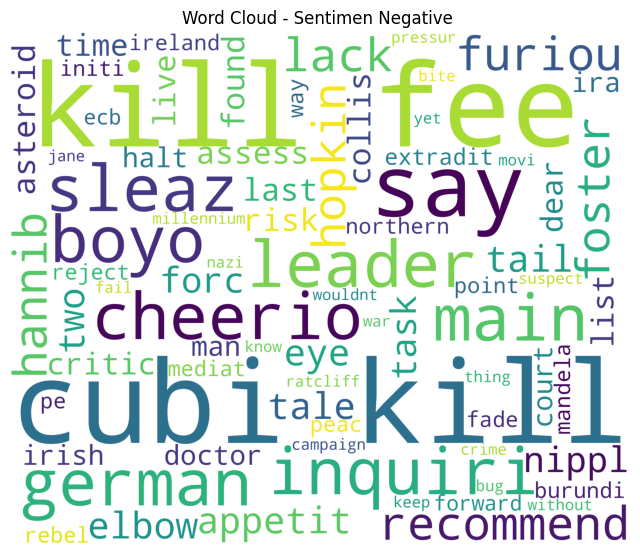

In [ ]:
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(down_words[1])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Word Cloud - Sentimen Negative ")
plt.show()

Penjelasan Code diatas : code diatas digunakan untuk membuat cloudword sentiment negatif. dimana kata kata negatif yang muncul itu ada cubi, kill, fee, german dan lainnya

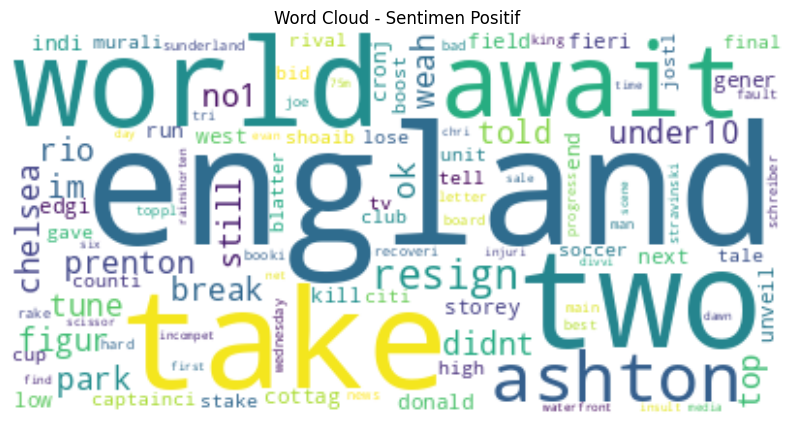

In [ ]:
negative_text = ' '.join([text for text, sentiment in zip(train_filtered_text_list, y_label_train) if sentiment == 0])
wordcloud_negative = WordCloud(background_color='white').generate(up_words[5])
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Sentimen Positif')
plt.show()

Penjelasan Code diatas : code diatas digunakan untuk membuat cloudword sentiment positif. dapat dilihat bahwa kata yang berdampak pada sentiment positif adalah england, word, take dan lainnya

In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer(max_features=10000, ngram_range=(2,2))
#X_train = cv.fit_transform(train_filtered_text_list).toarray()
#X_test = cv.transform(test_filtered_text_list).toarray()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(3, 3))
X_train = vectorizer.fit_transform(train_filtered_text_list)
X_test = vectorizer.transform(test_filtered_text_list)

Penjelasan Code diatas : Code diatas adalah feature extraction, hal ini diperlukan karena data yang tadinya object perlu dirubah menjadi numerik agar dapat dibaca oleh model dan juga bisa digunakan untuk mendapatkan akurasi yang baik

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#def tfidf(data):
#    tfidf_vectorizer = TfidfVectorizer()

#    train = tfidf_vectorizer.fit_transform(data)

 #   return train, tfidf_vectorizer

#X_train, tfidf_vectorizer = tfidf(train_filtered_text_list)
#X_test = tfidf_vectorizer.transform(train_filtered_text_list)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_label_train)

MultinomialNB()

Penjelasan Code diatas : Code diatas digunakan untuk proses modeling, dimana model yang kami gunakan merupakan model Multinomial Naive Bayes

In [ ]:
nb_y_pred = nb_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
score = accuracy_score(y_label_test, nb_y_pred)
precision = precision_score(y_label_test, nb_y_pred)
recall = recall_score(y_label_test, nb_y_pred)

print("Accuracy : ", score)
print("Precision : ", precision)
print("Recall : ", recall)

Accuracy :  0.8253968253968254
Precision :  0.8088235294117647
Recall :  0.859375


Penjelasan Code diatas : Akurasi dari model yang buat adalah 82% dengan nilai precision 80% dan recall 85%

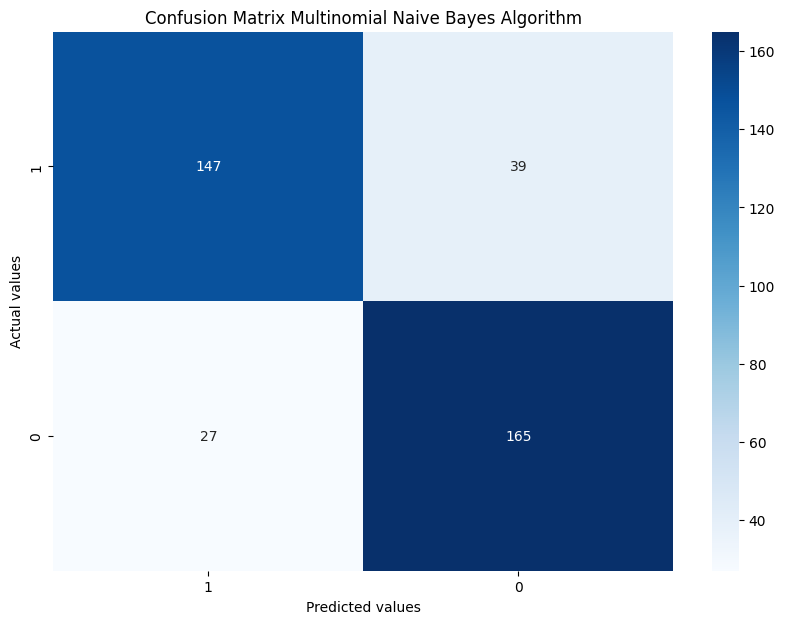

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_label_test, nb_y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(data=lr_cm, annot=True, fmt='d', cmap="Blues", xticklabels=['1', '0'], yticklabels=['1', '0'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix Multinomial Naive Bayes Algorithm')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

X_val_train = train_filtered_text_list  # List of preprocessed text data
y_val_train = y_label_train  # List of labels

pipeline = make_pipeline(CountVectorizer(), MultinomialNB())
scores = cross_val_score(pipeline, X_val_train, y_val_train, cv=5, scoring='accuracy')

print("Cross-validation accuracy scores:", scores)
average_accuracy = scores.mean()
print("Average accuracy:", average_accuracy)

Cross-validation accuracy scores: [0.52578616 0.50691824 0.47732997 0.50755668 0.5       ]
Average accuracy: 0.5035182104779558


In [ ]:
%%shell
jupyter nbconvert --to html /content/Copy_of_TEST_PROJEK.ipynb

[NbConvertApp] Converting notebook /content/Copy_of_TEST_PROJEK.ipynb to html
[NbConvertApp] Writing 1321740 bytes to /content/Copy_of_TEST_PROJEK.html
